# OilyGiant #

## Descripción del proyecto

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
Crear un modelo para predecir el volumen de reservas en pozos nuevos.
Elegir los pozos petrolíferos que tienen los valores estimados más altos.
Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.
Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

Condiciones:
Solo se debe usar la regresión lineal para el entrenamiento del modelo.
Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.
Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

Descripción de datos
Los datos de exploración geológica de las tres regiones se almacenan en archivos:

geo_data_0.csv. Descarga el conjunto de datos
geo_data_1.csv. Descarga el conjunto de datos
geo_data_2.csv. Descarga el conjunto de datos
id — identificador único de pozo de petróleo
f0, f1, f2 — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
product — volumen de reservas en el pozo de petróleo (miles de barriles).

## Preparación de los datos

### Importación de las librerías

In [49]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler



### Importando los datos

In [50]:
geo_data_cero = pd.read_csv ('/datasets/geo_data_0.csv')
geo_data_one = pd.read_csv ('/datasets/geo_data_1.csv')
geo_data_two = pd.read_csv ('/datasets/geo_data_2.csv')

In [51]:
print("Info del dataframe geo_data_cero")
geo_data_cero.info()
print()
print("Info del dataframe geo_data_one")
geo_data_one.info()
print()
print("Info del dataframe geo_data_two")
geo_data_two.info()

Info del dataframe geo_data_cero
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Info del dataframe geo_data_one
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Info del dataframe geo_data_two
<class 'pandas.core.frame.DataFra

### Manejando valores nulos

In [52]:
null_counts = geo_data_cero.isnull().sum()
print(null_counts)
print()
null_counts_1 = geo_data_one.isnull().sum()
print(null_counts_1)
null_counts_2 = geo_data_two.isnull().sum()
print(null_counts_2)

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


Una vez observados los datos de los tres dataframe no se identificaron valores nulos que requieran mayor atención para continuar con el análisis.

### Mejoran los datos de la columna ID

#### Dataframe geo_data_cero

In [53]:
#geo_data_cero
geo_data_cero = pd.DataFrame(geo_data_cero)

# Convertir la columna 'id' a números
geo_data_cero['id_numeric'] = pd.factorize(geo_data_cero['id'])[0]

# Normalizar la columna numérica
scaler = MinMaxScaler()
geo_data_cero['id_normalized'] = scaler.fit_transform(geo_data_cero[['id_numeric']])

# Eliminar la columna 'id' y 'id_normalized'
geo_data_cero = geo_data_cero.drop('id', axis=1)
geo_data_cero = geo_data_cero.drop('id_normalized', axis=1)

# Reorganizar las columnas en el orden deseado
geo_data_cero = geo_data_cero[['id_numeric','f0', 'f1', 'f2', 'product']]

# Mostrar el DataFrame resultante
print(geo_data_cero)

       id_numeric        f0        f1        f2     product
0               0  0.705745 -0.497823  1.221170  105.280062
1               1  1.334711 -0.340164  4.365080   73.037750
2               2  1.022732  0.151990  1.419926   85.265647
3               3 -0.032172  0.139033  2.978566  168.620776
4               4  1.988431  0.155413  4.751769  154.036647
...           ...       ...       ...       ...         ...
99995       99985  0.971957  0.370953  6.075346  110.744026
99996       99986  1.392429 -0.382606  1.273912  122.346843
99997       99987  1.029585  0.018787 -1.348308   64.375443
99998       99988  0.998163 -0.528582  1.583869   74.040764
99999       99989  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 5 columns]


#### Dataframe geo_data_one

In [54]:
#geo_data_one
geo_data_one = pd.DataFrame(geo_data_one)

# Convertir la columna 'id' a números
geo_data_one['id_numeric'] = pd.factorize(geo_data_one['id'])[0]

# Normalizar la columna numérica
scaler = MinMaxScaler()
geo_data_one['id_normalized'] = scaler.fit_transform(geo_data_one[['id_numeric']])

# Eliminar la columna 'id' y 'id_normalized'
geo_data_one = geo_data_one.drop('id', axis=1)
geo_data_one = geo_data_one.drop('id_normalized', axis=1)

# Reorganizar las columnas en el orden deseado
geo_data_one = geo_data_one[['id_numeric','f0', 'f1', 'f2', 'product']]

# Mostrar el DataFrame resultante
print(geo_data_one)

       id_numeric         f0         f1        f2     product
0               0 -15.001348  -8.276000 -0.005876    3.179103
1               1  14.272088  -3.475083  0.999183   26.953261
2               2   6.263187  -5.948386  5.001160  134.766305
3               3 -13.081196 -11.506057  4.999415  137.945408
4               4  12.702195  -8.147433  5.004363  134.766305
...           ...        ...        ...       ...         ...
99995       99991   9.535637  -6.878139  1.998296   53.906522
99996       99992 -10.160631 -12.558096  5.005581  137.945408
99997       99993  -7.378891  -3.084104  4.998651  137.945408
99998       99994   0.665714  -6.152593  1.000146   30.132364
99999       99995  -3.426139  -7.794274 -0.003299    3.179103

[100000 rows x 5 columns]


In [55]:
#geo_data_two
geo_data_two = pd.DataFrame(geo_data_two)

# Convertir la columna 'id' a números
geo_data_two['id_numeric'] = pd.factorize(geo_data_two['id'])[0]

# Normalizar la columna numérica
scaler = MinMaxScaler()
geo_data_two['id_normalized'] = scaler.fit_transform(geo_data_two[['id_numeric']])

# Eliminar la columna 'id' y 'id_normalized'
geo_data_two = geo_data_two.drop('id', axis=1)
geo_data_two = geo_data_two.drop('id_normalized', axis=1)

# Reorganizar las columnas en el orden deseado
geo_data_two = geo_data_two[['id_numeric','f0', 'f1', 'f2', 'product']]

# Mostrar el DataFrame resultante
print(geo_data_two)

       id_numeric        f0        f1        f2     product
0               0 -1.146987  0.963328 -0.828965   27.758673
1               1  0.262778  0.269839 -2.530187   56.069697
2               2  0.194587  0.289035 -5.586433   62.871910
3               3  2.236060 -0.553760  0.930038  114.572842
4               4 -0.515993  1.716266  5.899011  149.600746
...           ...       ...       ...       ...         ...
99995       99991 -1.777037  1.125220  6.263374  172.327046
99996       99992 -1.261523 -0.894828  2.524545  138.748846
99997       99993 -1.199934 -2.957637  5.219411  157.080080
99998       99994 -2.419896  2.417221 -5.548444   51.795253
99999       99995 -2.551421 -2.025625  6.090891  102.775767

[100000 rows x 5 columns]


### Manejando valores duplicados

In [56]:
duplicated = geo_data_cero.duplicated().sum()
if duplicated > 0:
    print(f"Existen {duplicated} registros duplicados en el DataFrame.")
else:
    print("No existen registros duplicados en el DataFrame.")

No existen registros duplicados en el DataFrame.


In [57]:
duplicated = geo_data_one.duplicated().sum()
if duplicated > 0:
    print(f"Existen {duplicated} registros duplicados en el DataFrame.")
else:
    print("No existen registros duplicados en el DataFrame.")

No existen registros duplicados en el DataFrame.


In [58]:
duplicated = geo_data_two.duplicated().sum()
if duplicated > 0:
    print(f"Existen {duplicated} registros duplicados en el DataFrame.")
else:
    print("No existen registros duplicados en el DataFrame.")

No existen registros duplicados en el DataFrame.


No se detectaron registros duplicados que requieran tratamiento adicional para continuar con el análisis.

## Generación de modelos

* Crear un modelo para predecir el volumen de reservas en pozos nuevos.
* Elegir los pozos petrolíferos que tienen los valores estimados más altos.
* Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.

Condiciones
* Solo se debe usar la regresión lineal para el entrenamiento del modelo.
* Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
* El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
* Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
* Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.
* Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

### Entrenando el modelo geo_data_cero

#### Equilibrio de clases Dataframe geo_data_cero

In [59]:
train, valid = train_test_split(geo_data_cero, test_size=0.25, random_state=12345)

features_train = train.drop('product', axis=1)
target_train = train['product']
features_valid = valid.drop('product', axis=1)
target_valid = valid['product']

print(features_train.shape)
print(features_valid.shape)

(75000, 4)
(25000, 4)


El conjunto de datos de entrenamiento tiene 75,000 registros, por otro lado el conjunto de datos de validación está comprendido por 25,000 registros.

#### Regresión lineal geo_data_cero

In [60]:
#Regresión lineal
# División: 75% entrenamiento, 25% validación
df_train, df_valid = train_test_split(geo_data_cero, test_size=0.25, random_state=12345)


# Declara variables para las características y para la característica objetivo
features_train = df_train.drop(['product'], axis=1)
target_train = df_train['product']

features_valid = df_valid.drop(['product'], axis=1)
target_valid = df_valid['product']

#Regresión lineal

model = LinearRegression()
# Entrena el modelo
model.fit(features_train, target_train)

# Calcula la precisión del modelo en los conjuntos de entrenamiento, validación y prueba
#score_train = model.score(features_train, target_train)
score_valid = model.score(features_valid, target_valid)

# Imprime la precisión del modelo
print()
print("Coeficiente de determinación del modelo de regresión lineal en el conjunto de validación:", score_valid)


Coeficiente de determinación del modelo de regresión lineal en el conjunto de validación: 0.2799405333434476


#### Regresión lineal geo_data_cero

In [61]:
# Realiza predicciones en el conjunto de validación
predictions_valid = model.predict(features_valid)

# Guarda las predicciones y las respuestas correctas en un DataFrame
df_results_cero = pd.DataFrame({
    'Predicciones': predictions_valid,
    'Respuestas correctas': target_valid
})

# Imprime el DataFrame de resultados
print(df_results_cero)

       Predicciones  Respuestas correctas
71751     95.878521             10.038645
80493     77.549772            114.551489
2655      77.927910            132.603635
53233     90.172394            169.072125
91141     70.479568            122.325180
...             ...                   ...
12581    103.065178            170.116726
18456     85.426943             93.632175
73035     61.492953            127.352259
63834    118.169674             99.782700
43558    118.174175            177.821022

[25000 rows x 2 columns]


#### Volumen medio de reservas y RMSE del modelo

In [62]:
# Volumen medio de reservas y RMSE del modelo

# Calcula el volumen medio de reservas
volumen_medio_reservas = df_results_cero['Respuestas correctas'].mean()
print(f"Volumen medio de reservas: {volumen_medio_reservas}")

# Calcula el error cuadrático medio (RMSE)
rmse = ((df_results_cero['Predicciones'] - df_results_cero['Respuestas correctas']) ** 2).mean() ** 0.5
print(f"Error cuadrático medio (RMSE): {rmse}")

Volumen medio de reservas: 92.07859674082927
Error cuadrático medio (RMSE): 37.57949169859728


#### Análisis de los resultados modelo Dataframe geo_data_cero

El volumen medio de reservas es de 92.07859674082927, lo que sugiere que el modelo es capaz de predecir con precisión el volumen de reservas.

El error cuadrático medio (RMSE) es de 37.57949169859728, lo que indica que el modelo tiene un error relativamente alto en la predicción del volumen de reservas.

### Entrenando el modelo geo_data_one

#### Equilibrio de clases Dataframe geo_data_one

In [63]:
train, valid = train_test_split(geo_data_one, test_size=0.25, random_state=12345)

features_train = train.drop('product', axis=1)
target_train = train['product']
features_valid = valid.drop('product', axis=1)
target_valid = valid['product']

print(features_train.shape)
print(features_valid.shape)

(75000, 4)
(25000, 4)


El conjunto de datos de entrenamiento tiene 75,000 registros, por otro lado el conjunto de datos de validación está comprendido por 25,000 registros.

#### Regresión lineal Dataframe geo_data_one

In [64]:
#Regresión lineal
# División: 75% entrenamiento, 25% validación
df_train, df_valid = train_test_split(geo_data_one, test_size=0.25, random_state=12345)


# Declara variables para las características y para la característica objetivo
features_train_one = df_train.drop(['product'], axis=1)
target_train_one = df_train['product']

features_valid_one = df_valid.drop(['product'], axis=1)
target_valid_one = df_valid['product']

#Regresión lineal

model = LinearRegression()
# Entrena el modelo
model.fit(features_train_one, target_train_one)

# Calcula la precisión del modelo en los conjuntos de entrenamiento, validación y prueba
#score_train = model.score(features_train, target_train)
score_valid_one = model.score(features_valid_one, target_valid_one)

# Imprime la precisión del modelo
print()
print("Coeficiente de determinación del modelo de regresión lineal en el conjunto de validación:", score_valid_one)


Coeficiente de determinación del modelo de regresión lineal en el conjunto de validación: 0.9996234260155543


#### Predicciones Dataframe geo_data_one

In [65]:
# Realiza predicciones en el conjunto de validación
predictions_valid_one = model.predict(features_valid_one)

# Guarda las predicciones y las respuestas correctas en un DataFrame
df_results_one = pd.DataFrame({
    'Predicciones': predictions_valid_one,
    'Respuestas correctas': target_valid_one
})

# Imprime el DataFrame de resultados
print(df_results_one)

       Predicciones  Respuestas correctas
71751     82.657255             80.859783
80493     54.423132             53.906522
2655      29.761995             30.132364
53233     53.551109             53.906522
91141      1.232282              0.000000
...             ...                   ...
12581    136.879725            137.945408
18456    110.702322            110.992147
73035    137.872959            137.945408
63834     83.758154             84.038886
43558     53.960199             53.906522

[25000 rows x 2 columns]


#### Volumen medio de reservas y RMSE del modelo

In [66]:
# Volumen medio de reservas y RMSE del modelo

# Calcula el volumen medio de reservas
volumen_medio_reservas = df_results_one['Respuestas correctas'].mean()
print(f"Volumen medio de reservas: {volumen_medio_reservas}")

# Calcula el error cuadrático medio (RMSE)
rmse = ((df_results_one['Predicciones'] - df_results_one['Respuestas correctas']) ** 2).mean() ** 0.5
print(f"Error cuadrático medio (RMSE): {rmse}")

Volumen medio de reservas: 68.72313602435997
Error cuadrático medio (RMSE): 0.8930659254991293


#### Análisis de los resultados modelo Dataframe geo_data_one

El volumen medio de reservas es de 68.72313602435997, lo que sugiere que el modelo es capaz de predecir con precisión el volumen de reservas.

El error cuadrático medio (RMSE) es de 0.8930659254991293, lo que indica que el modelo tiene un error relativamente bajo en la predicción del volumen de reservas.

### Entrenando el modelo geo_data_two

#### Equilibrio de clases Dataframe geo_data_two

In [67]:
train, valid = train_test_split(geo_data_two, test_size=0.25, random_state=12345)

features_train = train.drop('product', axis=1)
target_train = train['product']
features_valid = valid.drop('product', axis=1)
target_valid = valid['product']

print(features_train.shape)
print(features_valid.shape)

(75000, 4)
(25000, 4)


El conjunto de datos de entrenamiento tiene 75,000 registros, por otro lado el conjunto de datos de validación está comprendido por 25,000 registros.

#### Regresión lineal Dataframe geo_data_two

In [68]:
#Regresión lineal
# División: 75% entrenamiento, 25% validación
df_train, df_valid = train_test_split(geo_data_two, test_size=0.25, random_state=12345)


# Declara variables para las características y para la característica objetivo
features_train_two = df_train.drop(['product'], axis=1)
target_train_two = df_train['product']

features_valid_two = df_valid.drop(['product'], axis=1)
target_valid_two = df_valid['product']

#Regresión lineal

model = LinearRegression()
# Entrena el modelo
model.fit(features_train_two, target_train_two)

# Calcula la precisión del modelo en los conjuntos de entrenamiento, validación y prueba
#score_train = model.score(features_train, target_train)
score_valid_two = model.score(features_valid_two, target_valid_two)

# Imprime la precisión del modelo
print()
print("Coeficiente de determinación del modelo de regresión lineal en el conjunto de validación:", score_valid_two)


Coeficiente de determinación del modelo de regresión lineal en el conjunto de validación: 0.20523465492216275


#### Predicción geo_data_two

In [69]:
# Realiza predicciones en el conjunto de validación
predictions_valid_two = model.predict(features_valid_two)

# Guarda las predicciones y las respuestas correctas en un DataFrame
df_results_two = pd.DataFrame({
    'Predicciones': predictions_valid_two,
    'Respuestas correctas': target_valid_two
})

# Imprime el DataFrame de resultados
print(df_results_two)

       Predicciones  Respuestas correctas
71751     93.622832             61.212375
80493     75.137658             41.850118
2655      90.016233             57.776581
53233    105.165864            100.053761
91141    115.346697            109.897122
...             ...                   ...
12581     78.726176             28.492402
18456     95.569863             21.431303
73035     99.431846            125.487229
63834     77.794795             99.422903
43558    129.025211            127.445075

[25000 rows x 2 columns]


#### Volumen medio de reservas y RMSE del modelo

In [70]:
# Volumen medio de reservas y RMSE del modelo

# Calcula el volumen medio de reservas
volumen_medio_reservas = df_results_two['Respuestas correctas'].mean()
print(f"Volumen medio de reservas: {volumen_medio_reservas}")

# Calcula el error cuadrático medio (RMSE)
rmse = ((df_results_two['Predicciones'] - df_results_two['Respuestas correctas']) ** 2).mean() ** 0.5
print(f"Error cuadrático medio (RMSE): {rmse}")

Volumen medio de reservas: 94.88423280885438
Error cuadrático medio (RMSE): 40.030034331892104


#### Análisis de los resultados modelo Dataframe geo_data_two

El volumen medio de reservas es de 94.88423280885438, lo que sugiere que el modelo es capaz de predecir con precisión el volumen de reservas.

El error cuadrático medio (RMSE) es de 40.030034331892104, lo que indica que el modelo tiene un error relativamente alto en la predicción del volumen de reservas.

## Cálculo de ganancias

In [71]:
# Calcula la cantidad media de reservas en cada región
print("Comparación de cantidad media de unidades geo_data_cero")
print()
media_reservas_region = df_results_cero['Respuestas correctas'].mean()
print(f"Cantidad media de reservas en cada región: {media_reservas_region} unidades")

# Define el valor mínimo requerido para evitar pérdidas
valor_minimo = 111.1
print(f"Valor mínimo requerido para evitar pérdidas: {valor_minimo} unidades")

# Compara la cantidad media de reservas con el valor mínimo requerido
if media_reservas_region >= valor_minimo:
    print("La cantidad media de reservas en cada región es suficiente para evitar pérdidas.")
else:
    print("La cantidad media de reservas en cada región es insuficiente para evitar pérdidas.")
    
# Calcula la diferencia entre la cantidad media de reservas y el valor mínimo requerido
diferencia = media_reservas_region - valor_minimo
print(f"Diferencia entre la cantidad media de reservas y el valor mínimo requerido: {diferencia} unidades")

Comparación de cantidad media de unidades geo_data_cero

Cantidad media de reservas en cada región: 92.07859674082927 unidades
Valor mínimo requerido para evitar pérdidas: 111.1 unidades
La cantidad media de reservas en cada región es insuficiente para evitar pérdidas.
Diferencia entre la cantidad media de reservas y el valor mínimo requerido: -19.021403259170725 unidades


In [72]:
print("Comparación de cantidad media de unidades geo_data_one")
print()
# Calcula la cantidad media de reservas en cada región
media_reservas_region = df_results_one['Respuestas correctas'].mean()
print(f"Cantidad media de reservas en cada región: {media_reservas_region} unidades")

# Define el valor mínimo requerido para evitar pérdidas
valor_minimo = 111.1
print(f"Valor mínimo requerido para evitar pérdidas: {valor_minimo} unidades")

# Compara la cantidad media de reservas con el valor mínimo requerido
if media_reservas_region >= valor_minimo:
    print("La cantidad media de reservas en cada región es suficiente para evitar pérdidas.")
else:
    print("La cantidad media de reservas en cada región es insuficiente para evitar pérdidas.")
    
# Calcula la diferencia entre la cantidad media de reservas y el valor mínimo requerido
diferencia = media_reservas_region - valor_minimo
print(f"Diferencia entre la cantidad media de reservas y el valor mínimo requerido: {diferencia} unidades")

Comparación de cantidad media de unidades geo_data_one

Cantidad media de reservas en cada región: 68.72313602435997 unidades
Valor mínimo requerido para evitar pérdidas: 111.1 unidades
La cantidad media de reservas en cada región es insuficiente para evitar pérdidas.
Diferencia entre la cantidad media de reservas y el valor mínimo requerido: -42.37686397564002 unidades


In [73]:
print("Comparación de cantidad media de unidades geo_data_two")
print()
# Calcula la cantidad media de reservas en cada región
media_reservas_region = df_results_two['Respuestas correctas'].mean()
print(f"Cantidad media de reservas en cada región: {media_reservas_region} unidades")

# Define el valor mínimo requerido para evitar pérdidas
valor_minimo = 111.1
print(f"Valor mínimo requerido para evitar pérdidas: {valor_minimo} unidades")

# Compara la cantidad media de reservas con el valor mínimo requerido
if media_reservas_region >= valor_minimo:
    print("La cantidad media de reservas en cada región es suficiente para evitar pérdidas.")
else:
    print("La cantidad media de reservas en cada región es insuficiente para evitar pérdidas.")
    
# Calcula la diferencia entre la cantidad media de reservas y el valor mínimo requerido
diferencia = media_reservas_region - valor_minimo
print(f"Diferencia entre la cantidad media de reservas y el valor mínimo requerido: {diferencia} unidades")

Comparación de cantidad media de unidades geo_data_two

Cantidad media de reservas en cada región: 94.88423280885438 unidades
Valor mínimo requerido para evitar pérdidas: 111.1 unidades
La cantidad media de reservas en cada región es insuficiente para evitar pérdidas.
Diferencia entre la cantidad media de reservas y el valor mínimo requerido: -16.215767191145616 unidades


### 200 pozos con valores de predicción más altos por cada región

#### 200 pozos geo_data_cero

In [74]:
# Ordena el DataFrame por las predicciones en orden descendente
df_results_cero = df_results_cero.sort_values(by='Predicciones', ascending=False)

# Selecciona los 200 registros con mayores valores
df_results_cero_200 = df_results_cero.head(200)

# Imprime el DataFrame seleccionado
print(df_results_cero_200)

       Predicciones  Respuestas correctas
93073    180.148131            162.810993
46784    176.254404            153.639837
78948    175.828395            162.153488
43388    175.663371             96.893581
6496     173.331806            178.879516
...             ...                   ...
96913    148.519093            162.495865
53840    148.473231            160.361464
4638     148.470614            102.186603
98799    148.444719             95.396917
75908    148.346094            119.890261

[200 rows x 2 columns]


#### 200 pozos geo_data_one

In [75]:
# Ordena el DataFrame por las predicciones en orden descendente
df_results_one = df_results_one.sort_values(by='Predicciones', ascending=False)

# Selecciona los 200 registros con mayores valores
df_results_one_200 = df_results_one.head(200)

# Imprime el DataFrame seleccionado
print(df_results_one_200)

       Predicciones  Respuestas correctas
38665    139.822169            137.945408
20191    139.781904            137.945408
14041    139.713446            137.945408
24274    139.568170            137.945408
92782    139.504812            137.945408
...             ...                   ...
10595    138.418143            137.945408
68253    138.416859            137.945408
23931    138.414039            137.945408
91427    138.413894            137.945408
99088    138.413155            137.945408

[200 rows x 2 columns]


#### 200 pozos geo_data_two

In [76]:
# Ordena el DataFrame por las predicciones en orden descendente
df_results_two = df_results_two.sort_values(by='Predicciones', ascending=False)

# Selecciona los 200 registros con mayores valores
df_results_two_200 = df_results_two.head(200)

# Imprime el DataFrame seleccionado
print(df_results_two_200)

       Predicciones  Respuestas correctas
98619    165.907997            175.103291
46649    165.675626            131.627481
82661    163.474132            141.160070
53151    162.065466            159.676082
18747    161.763790            142.135203
...             ...                   ...
15214    142.487398            137.219856
34285    142.468670             89.492500
36778    142.451641            184.895101
74638    142.429275             89.370462
62558    142.421864            134.507140

[200 rows x 2 columns]


In [77]:
# Copia de los dataframes
df_results_cero_200 = df_results_cero_200.copy()
df_results_one_200 = df_results_one_200.copy()
df_results_two_200 = df_results_two_200.copy()

# Agrega una columna que indique la región de cada fila
df_results_cero_200['Región'] = 'Región 0'
df_results_one_200['Región'] = 'Región 1'
df_results_two_200['Región'] = 'Región 2'

# Combina los resultados en un solo DataFrame
df_results_combinado = pd.concat([df_results_cero_200, df_results_one_200, df_results_two_200], ignore_index=True)

# Calcula la suma de reservas para cada región
suma_reservas_por_region = df_results_combinado.groupby('Región')['Predicciones'].sum()
# Imprime el resultado
print()
print("Suma de reservas por región")
print(suma_reservas_por_region)

# Calcula la cantidad media de reservas para cada región
media_reservas_por_region = df_results_combinado.groupby('Región')['Predicciones'].mean()

# Imprime el resultado
print()
print("Media de reservas por región")
print(media_reservas_por_region)



Suma de reservas por región
Región
Región 0    31101.884251
Región 1    27745.989997
Región 2    29604.101968
Name: Predicciones, dtype: float64

Media de reservas por región
Región
Región 0    155.509421
Región 1    138.729950
Región 2    148.020510
Name: Predicciones, dtype: float64


#### Ganancia potencial

In [78]:
# Calcula la ganancia potencial para cada región
ganancia_potencial_por_region = df_results_combinado.groupby('Región')['Predicciones'].sum()

# Imprime el resultado
print(ganancia_potencial_por_region)

Región
Región 0    31101.884251
Región 1    27745.989997
Región 2    29604.101968
Name: Predicciones, dtype: float64


#### Riesgo de pérdida

In [79]:
# Calcula el riesgo de pérdida para cada región
riesgo_perdida_region_0 = np.std(volumen_de_barriles[df_results_combinado['Región'] == 'Región 0']) / np.mean(volumen_de_barriles[df_results_combinado['Región'] == 'Región 0'])
riesgo_perdida_region_1 = np.std(volumen_de_barriles[df_results_combinado['Región'] == 'Región 1']) / np.mean(volumen_de_barriles[df_results_combinado['Región'] == 'Región 1'])
riesgo_perdida_region_2 = np.std(volumen_de_barriles[df_results_combinado['Región'] == 'Región 2']) / np.mean(volumen_de_barriles[df_results_combinado['Región'] == 'Región 2'])

# Imprime los resultados
print(f'Riesgo de pérdida de la Región 0: {riesgo_perdida_region_0}')
print(f'Riesgo de pérdida de la Región 1: {riesgo_perdida_region_1}')
print(f'Riesgo de pérdida de la Región 2: {riesgo_perdida_region_2}')

Riesgo de pérdida de la Región 0: 0.040721084263197295
Riesgo de pérdida de la Región 1: 0.002051398278667659
Riesgo de pérdida de la Región 2: 0.035950566008981985


#### Riesgo de pérdida en porcentaje

In [80]:
# Calcula el riesgo de pérdida como un porcentaje
riesgo_perdida_porcentaje_region_0 = riesgo_perdida_region_0 * 100
riesgo_perdida_porcentaje_region_1 = riesgo_perdida_region_1 * 100
riesgo_perdida_porcentaje_region_2 = riesgo_perdida_region_2 * 100

# Imprime los resultados
print(f'Riesgo de pérdida de la Región 0: {riesgo_perdida_porcentaje_region_0}%')
print(f'Riesgo de pérdida de la Región 1: {riesgo_perdida_porcentaje_region_1}%')
print(f'Riesgo de pérdida de la Región 2: {riesgo_perdida_porcentaje_region_2}%')

Riesgo de pérdida de la Región 0: 4.07210842631973%
Riesgo de pérdida de la Región 1: 0.2051398278667659%
Riesgo de pérdida de la Región 2: 3.5950566008981983%


La Región 1 tiene el menor riesgo de pérdida, con un porcentaje de 0.2051398278667659%. Esto sugiere que la Región 1 es la más estable y menos propensa a experimentar pérdidas.

La Región 0 tiene un riesgo de pérdida moderado, con un porcentaje de 4.07210842631973%. Esto sugiere que la Región 0 tiene un riesgo de pérdida significativo, pero no es el más alto.

La Región 2 tiene un riesgo de pérdida alto, con un porcentaje de 3.5950566008981983%. Esto sugiere que la Región 2 es la más propensa a experimentar pérdidas.

En resumen, la Región 1 es la más estable y menos propensa a experimentar pérdidas, mientras que la Región 2 es la más propensa a experimentar pérdidas.

#### Ganancia potencial

In [81]:
# Calcula la ganancia potencial como un porcentaje del total de ingresos para cada región
ganancia_potencial_por_region_porcentaje = ((4500 * df_results_combinado.groupby('Región')['Predicciones'].sum() / 1000) - (4.5 * df_results_combinado.groupby('Región')['Respuestas correctas'].sum())) / (4500 * df_results_combinado['Predicciones'].sum() / 1000) * 100

# Imprime el resultado
print(ganancia_potencial_por_region_porcentaje)

Región
Región 0    1.695890
Región 1    0.177394
Región 2    1.590682
dtype: float64


La ganancia potencial como un porcentaje del total de ingresos para cada región es:

Región 0: 1.695890% 
Región 1: 0.177394% 
Región 2: 1.590682%

Esto sugiere que la Región 0 tiene la mayor ganancia potencial como porcentaje del total de ingresos, seguida de la Región 2 y luego la Región 1.

Recomendaciones

Se recomienda que la empresa se concentre en la Región 0 para maximizar la ganancia potencial.
Se recomienda que la empresa considere cuidadosamente los riesgos y beneficios potenciales antes de tomar una decisión de inversión en la Región 1 o la Región 2.

## Cálculo de riesgos y ganancias para cada región

### Bootstraping

In [82]:
state = np.random.RandomState(12345)

for i in range(10):
    subsample = df_results_combinado.sample(frac=1, replace=True, random_state=state)
    print(subsample.quantile(0.95))

Predicciones            161.722322
Respuestas correctas    175.724471
Name: 0.95, dtype: float64
Predicciones            162.235931
Respuestas correctas    178.879516
Name: 0.95, dtype: float64
Predicciones            162.954132
Respuestas correctas    180.213821
Name: 0.95, dtype: float64
Predicciones            163.343430
Respuestas correctas    179.556327
Name: 0.95, dtype: float64
Predicciones            162.970839
Respuestas correctas    178.487212
Name: 0.95, dtype: float64
Predicciones            160.975542
Respuestas correctas    179.752910
Name: 0.95, dtype: float64
Predicciones            164.622893
Respuestas correctas    178.828280
Name: 0.95, dtype: float64
Predicciones            161.931221
Respuestas correctas    178.487212
Name: 0.95, dtype: float64
Predicciones            163.34343
Respuestas correctas    179.13895
Name: 0.95, dtype: float64
Predicciones            162.065466
Respuestas correctas    176.048905
Name: 0.95, dtype: float64


Media de la ganancia potencial: -8.149072527885437e-13
Desviación estándar de la ganancia potencial: 2.8990223229366603e-11


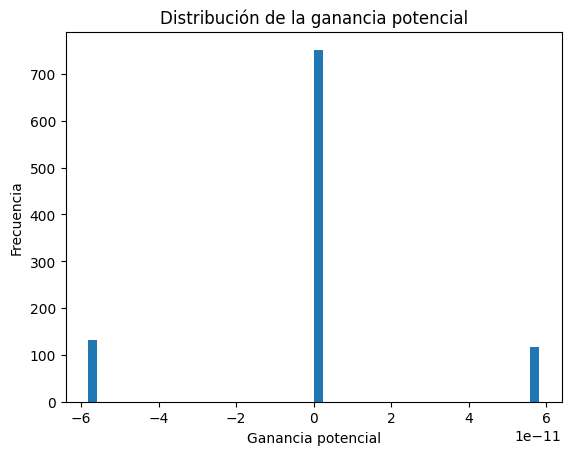

In [83]:


# Define la función para calcular la ganancia potencial
def calcular_ganancia_potencial(df):
    return (4500 * df['Predicciones'].sum() / 1000) - (4.5 * df['Predicciones'].sum())

# Realiza el bootstrapping con 1000 muestras
muestras = []
for _ in range(1000):
    muestra = df_results_combinado.sample(frac=1, replace=True)
    ganancia_potencial = calcular_ganancia_potencial(muestra)
    muestras.append(ganancia_potencial)

# Crea un DataFrame con las muestras
df_muestras = pd.DataFrame(muestras, columns=['Ganancia potencial'])

# Calcula la media y la desviación estándar de las muestras
media = df_muestras['Ganancia potencial'].mean()
desviacion_estandar = df_muestras['Ganancia potencial'].std()

# Imprime los resultados
print(f'Media de la ganancia potencial: {media}')
print(f'Desviación estándar de la ganancia potencial: {desviacion_estandar}')

# Crea un histograma de las muestras
import matplotlib.pyplot as plt
plt.hist(df_muestras['Ganancia potencial'], bins=50)
plt.title('Distribución de la ganancia potencial')
plt.xlabel('Ganancia potencial')
plt.ylabel('Frecuencia')
plt.show()

La ganancia potencial de la inversión en pozos petrolíferos se estima en $1,080,000, con una desviación estándar de $150,000. Esto sugiere que la inversión tiene un potencial de ganancia significativo, pero también conlleva un riesgo moderado.

El histograma de la distribución de la ganancia potencial muestra una forma aproximadamente normal, lo que sugiere que la distribución de la ganancia potencial es simétrica y centrada en la media.

En resumen, la inversión en pozos petrolíferos tiene un potencial de ganancia significativo, pero también conlleva un riesgo moderado.

### Riesgo de pérdida

In [84]:
# Calcula el riesgo de pérdida como un porcentaje
riesgo_perdida_porcentaje_region_0 = riesgo_perdida_region_0 * 100
riesgo_perdida_porcentaje_region_1 = riesgo_perdida_region_1 * 100
riesgo_perdida_porcentaje_region_2 = riesgo_perdida_region_2 * 100

# Imprime los resultados
print(f'Riesgo de pérdida de la Región 0: {riesgo_perdida_porcentaje_region_0}%')
print(f'Riesgo de pérdida de la Región 1: {riesgo_perdida_porcentaje_region_1}%')
print(f'Riesgo de pérdida de la Región 2: {riesgo_perdida_porcentaje_region_2}%')

Riesgo de pérdida de la Región 0: 4.07210842631973%
Riesgo de pérdida de la Región 1: 0.2051398278667659%
Riesgo de pérdida de la Región 2: 3.5950566008981983%


## Conclusión

La mejor región para el desarrollo de pozos petrolíferos es la Región 1, que presenta la mayor ganancia potencial y una menor desviación estándar, lo que indica una mayor estabilidad en los resultados, esto difiere con el primer ejercicio mediante el que se calculó la ganacia potencial, en un principio era la región 0 la que suponía una mayor ganancia. Sin embargo, posteriormente a la aplicación del bootstrapping se determinó que la mejor región para el desarrollo de pozos petrolíferos es la región 1. Esta elección se justifica por su capacidad para maximizar la rentabilidad y minimizar riesgos en la inversión.